In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [57]:
#读取数据集
data = pd.read_csv('data.csv')

#展示前五行数据
display(data.head())

#删除无用列
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


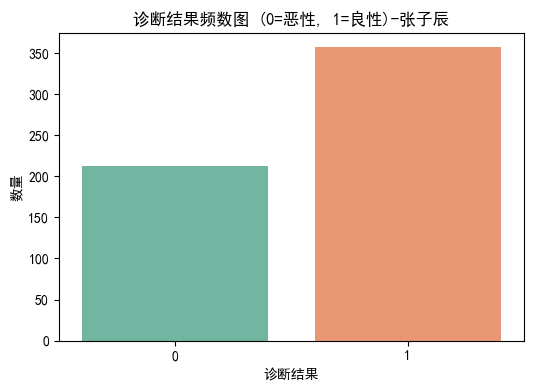

In [58]:
#将M和B映射为0和1，0表示恶性，1表示良性
data['diagnosis'] = data['diagnosis'].map({'M': 0, 'B': 1})

#绘制条形图
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=data, hue='diagnosis', palette='Set2', legend=False)
plt.title("诊断结果频数图 (0=恶性, 1=良性)-张子辰")
plt.xlabel("诊断结果")
plt.ylabel("数量")
plt.show()

直方图用于展示每个特征的分布情况

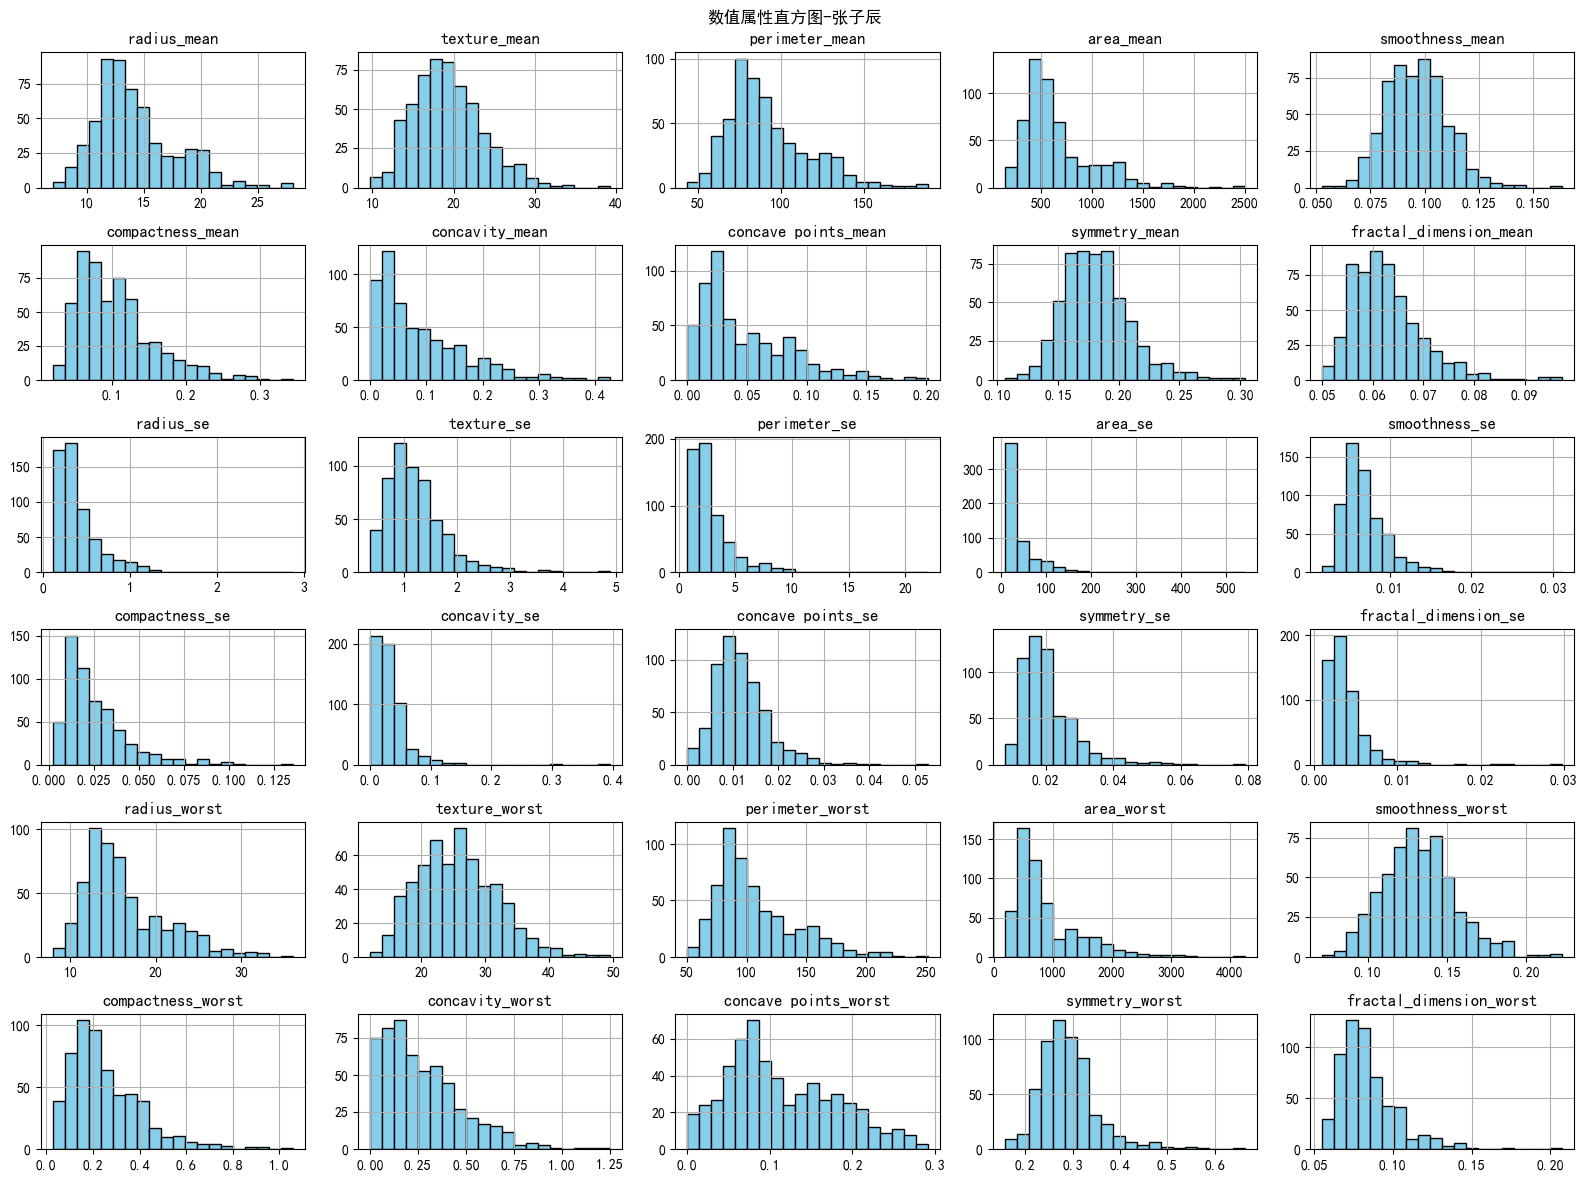

In [59]:
#所有特征直方图
data.drop('diagnosis', axis=1).hist(bins=20, figsize=(16, 12), color='skyblue', edgecolor='black')
plt.suptitle("数值属性直方图-张子辰")
plt.tight_layout()
plt.show()

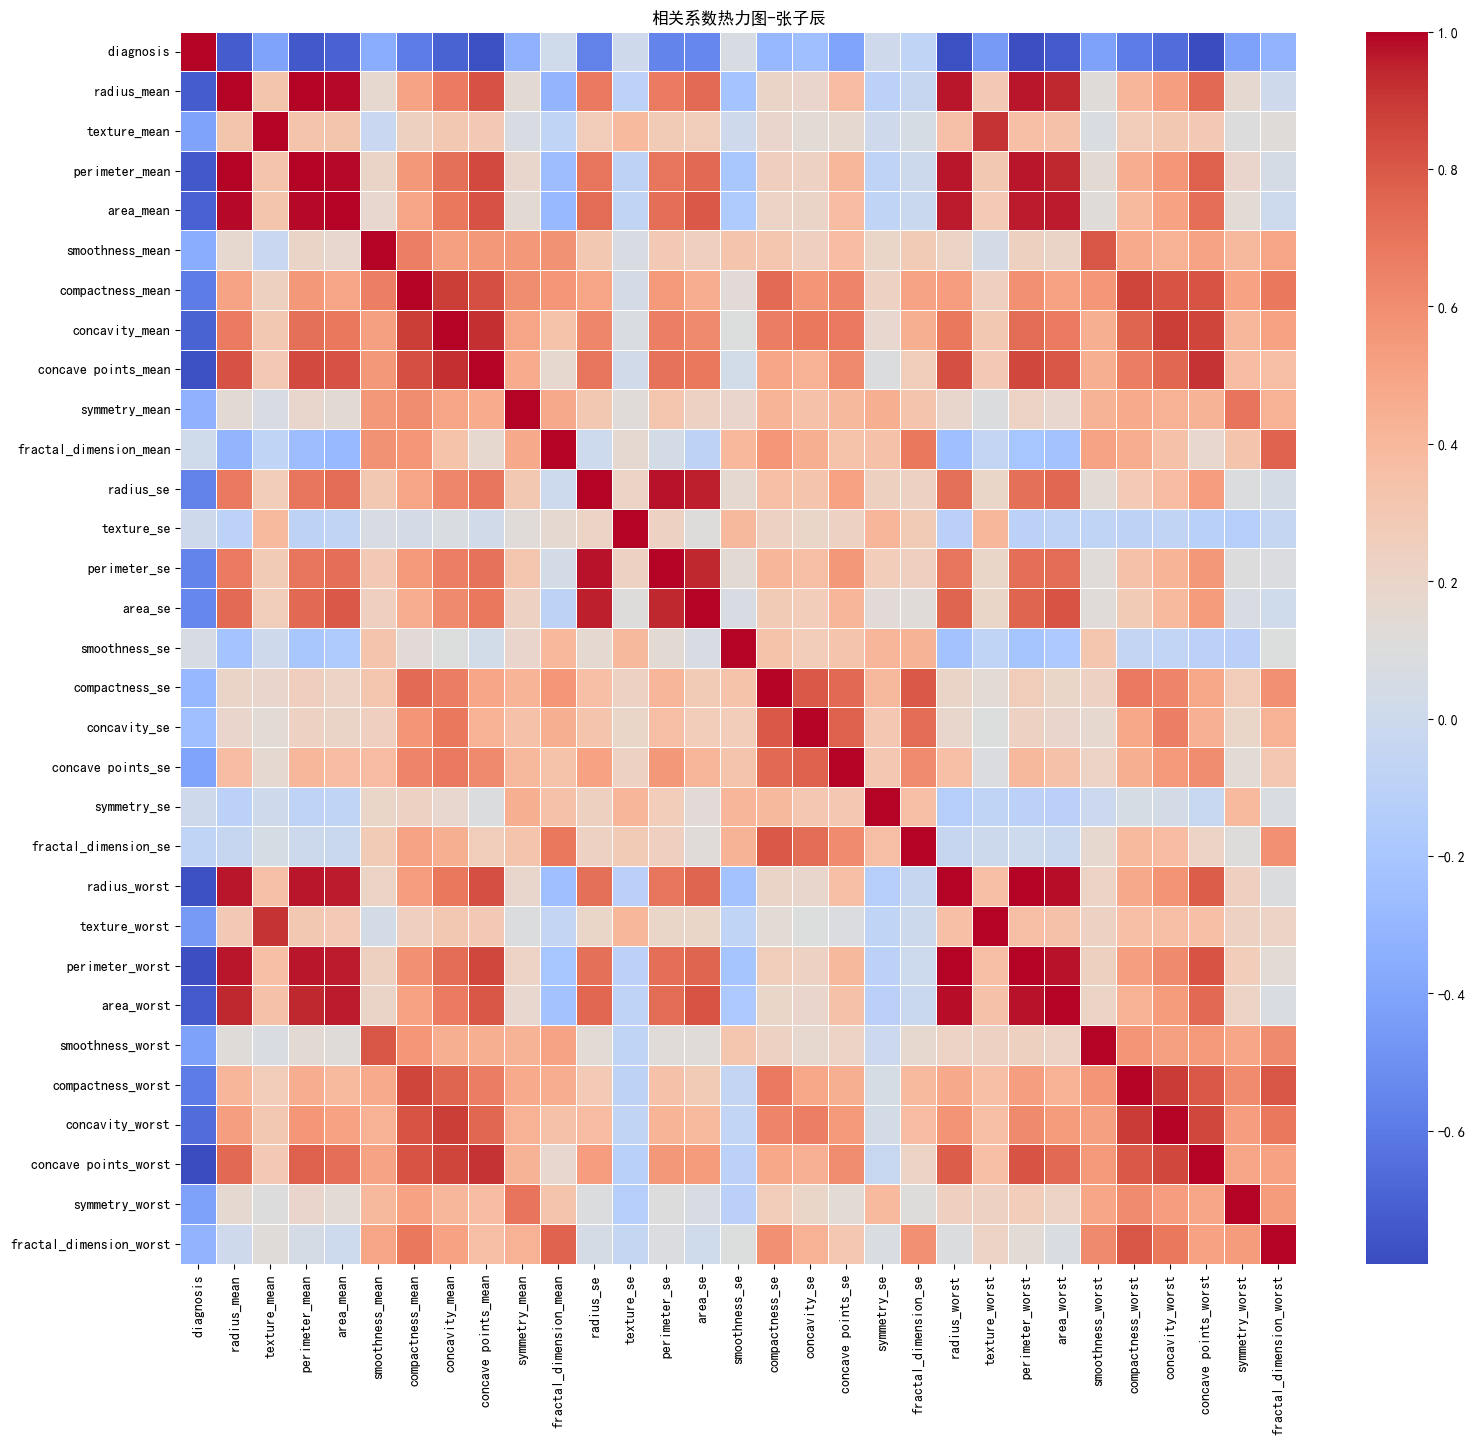

删除冗余特征前的数据维度： (569, 31)
高相关性特征: ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']
删除冗余特征后的数据维度： (569, 21)


In [60]:
plt.figure(figsize=(18, 16))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("相关系数热力图-张子辰")
plt.show()

print("删除冗余特征前的数据维度：", data.shape)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper.columns if any(upper[column].abs() > 0.9)]
print("高相关性特征:", high_corr_features)
data.drop(columns=high_corr_features, inplace=True)
print("删除冗余特征后的数据维度：", data.shape)

In [61]:
#特征和标签
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

#划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#建立逻辑回归模型
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

#预测
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [62]:
#评估结果
print("分类报告：\n", classification_report(y_test, y_pred))
print("混淆矩阵：\n", confusion_matrix(y_test, y_pred))

分类报告：
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

混淆矩阵：
 [[40  3]
 [ 2 69]]


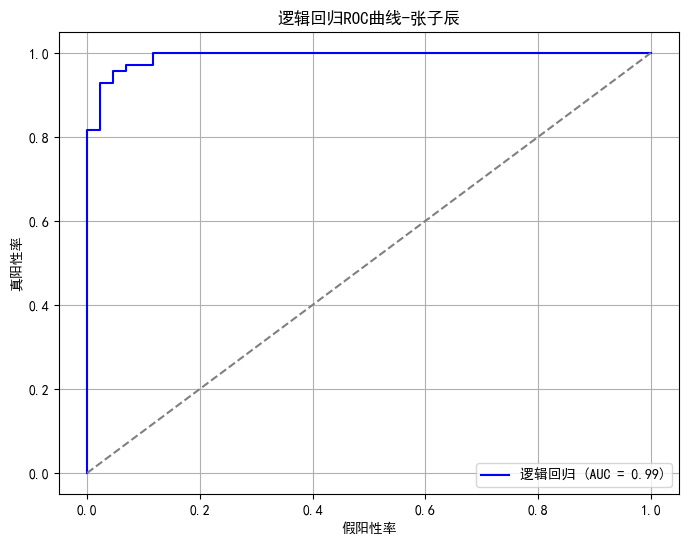

In [63]:
#计算ROC曲线和AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'逻辑回归 (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("假阳性率")
plt.ylabel("真阳性率")
plt.title("逻辑回归ROC曲线-张子辰")
plt.legend()
plt.grid(True)
plt.show()